<a href="https://colab.research.google.com/github/KaiaX926/KaiaX926/blob/main/5241_Milestone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Preparation

In [ ]:
import torchvision
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
DOWNLOAD_MNIST = True # If already download , set as False
train_data = torchvision . datasets . MNIST (
  root ='./ mnist /',
  train = True , # this is training data
  # transform = torchvision . transforms . ToTensor () ,
  download = DOWNLOAD_MNIST ,
)
test_data = torchvision . datasets . MNIST ( root ='./ mnist /', train = False )

# change the features to numpy
X_train = train_data . train_data . numpy ()
X_test = test_data . test_data . numpy ()

# change the labels to numpy
Y_train = train_data . train_labels . numpy ()
Y_test = test_data . test_labels . numpy ()

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./ mnist /MNIST/raw/train-images-idx3-ubyte.gz to ./ mnist /MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./ mnist /MNIST/raw/train-labels-idx1-ubyte.gz to ./ mnist /MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./ mnist /MNIST/raw/t10k-images-idx3-ubyte.gz to ./ mnist /MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./ mnist /MNIST/raw/t10k-labels-idx1-ubyte.gz to ./ mnist /MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


# 2.Data Processing

## **(a)** 
Plot one sample in X train. What is the number you see from the 28 × 28 pixel-field? Does it match with the label in Y train?

A: Yes. The image of figure 3 has the label as 3


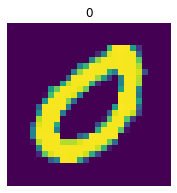

In [ ]:
image_idx = np.random.choice(range(X_train.shape[0]))
image = X_train[image_idx]
image_class = Y_train[image_idx]
plt.figure(figsize=(3, 3))
plt.imshow(X_train[image_idx].astype("uint8"))
plt.title(image_class)
_ = plt.axis("off")

## **(b)** 
What is the dimension of X train and X test? Normalize X train and X test such that the value of each element lies in [0, 1].

In [ ]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
np.max(X_train),np.min(X_train),np.max(X_test),np.min(X_test)

(255, 0, 255, 0)

In [ ]:
X_train_normalized = X_train/255
X_test_normalized = X_test/255

# for i in range(len(X_train)):
#   X_train_normalized[i] = (X_train[i] - np.mean(X_train[i])) / np.std(X_train[i])

# for i in range(len(X_test)):
#   X_test_normalized[i] = (X_test[i] - np.mean(X_test[i])) / np.std(X_test[i])

print(X_train_normalized.shape, X_test_normalized.shape)
print(np.max(X_train_normalized), np.min(X_train_normalized),np.max(X_test_normalized), np.min(X_test_normalized))

(60000, 28, 28) (10000, 28, 28)
1.0 0.0 1.0 0.0


## **(c)** 
A popular choice to deal with the labels is to use the one-hot embedding. Represent
Y train and Y test using one-hot embedding. List the benefit of such transformation.

In [ ]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(Y_train, num_classes=10)
test_labels = to_categorical(Y_test, num_classes=10)
print(train_labels.shape, np.unique(train_labels))

(60000, 10) [0. 1.]


1. It eliminates the influence of the numeric value labels in prediction. For example, the computer might assume group 1 is closer to group 2 than to group 9. However, the distance between them is not affected by the group number at all.
2. If the tags are strings, one-hot embedding will help transfer the labels into numbers for predictions.

# 3. Before Deep Learning

## **(a)** 
Try to implement and train the above mentioned classifier on the training
dataset, and report the test errors of them using the test dataset. Can you reproduce
the results? If not, please justify your reason

A: The specific test error cannot be reproduced since the random state is not anchored. However, the trend of error rate among the three predictors is maintained.

In [ ]:
def errorrate(y_pred, y_true):
  error = sum([y_pred[i]!=y_true[i] for i in range(len(y_true))])
  return error/len(y_true)

### KNN

In [ ]:
# x_train = np.reshape(X_train_normalized,(60000,28*28))
# x_test = np.reshape(X_test_normalized,(10000,28*28))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(np.reshape(X_train_normalized,(60000,28*28)),Y_train)
knn_prediction = KNN.predict(np.reshape(X_test_normalized,(10000,28*28)))
KNN_accuracy = accuracy_score(Y_test, knn_prediction)
print('Test Error of KNN is: ', errorrate(knn_prediction,Y_test))
print('Accuracy_score of KNN is: ', KNN_accuracy)

Test Error of KNN is:  0.0335
Accuracy_score of KNN is:  0.9665


### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
ABC.fit(np.reshape(X_train_normalized,(60000,28*28)),Y_train)
abc_prediction = ABC.predict(np.reshape(X_test_normalized,(10000,28*28)))
ABC_accuracy = accuracy_score(Y_test, abc_prediction)
print('Test Error of AdaBoost is: ', errorrate(abc_prediction,Y_test))
print('Accuracy_score of AdaBoost is: ', ABC_accuracy)

Test Error of AdaBoost is:  0.2111
Accuracy_score of AdaBoost is:  0.7889


### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
SVM = SVC(kernel='rbf')
SVM.fit(np.reshape(X_train_normalized,(60000,28*28)),Y_train)
svm_prediction = SVM.predict(np.reshape(X_test_normalized,(10000,28*28)))
SVM_accuracy = accuracy_score(Y_test, svm_prediction)
print('Test Error of SVM is: ', errorrate(svm_prediction,Y_test))
print('Accuracy_score of SVM is: ', SVM_accuracy)

Test Error of SVM is:  0.0208
Accuracy_score of SVM is:  0.9792


## **(b)**
Pick your favorite classifier (not limited to the above mentioned algorithms)
and try to implement it on the training set and report the test error using the test
dataset. Turn the hyperparameters until it out perform all three of the classifier you
implemented in part 2(a).

### SVM GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

#parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid', 'precomputed'), 'C':[1, 5]}
#parameters = {'C':[0.1, 0.5, 1, 2],'degree':[3,4,5]}
parameters = {'degree':[3,4,5,6,7]}

clf_svc = SVC(kernel = 'poly')
clf = GridSearchCV(clf_svc, parameters, refit=True)
clf.fit(np.reshape(X_train_normalized,(60000,28*28)),Y_train)
#print('The model we pick is SVM with:', clf.best_params_())
clf_prediction = clf.predict(np.reshape(X_test_normalized,(10000,28*28)))
clf_accuracy = accuracy_score(Y_test, clf_prediction)
print('Test Error of a better SVM is: ', errorrate(clf_prediction,Y_test))
print('Accuracy_score of a better SVM is: ', clf_accuracy)

Test Error of a better SVM is:  0.0229
Accuracy_score of a better SVM is:  0.9771


### Gaussian Navie Bayesian

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(np.reshape(X_train_normalized,(60000,28*28)),Y_train)
gnb_prediction = gnb.predict(np.reshape(X_test_normalized,(10000,28*28)))
gnb_accuracy = accuracy_score(Y_test, gnb_prediction)
print('Test Error of a better GaussianNB is: ', errorrate(gnb_prediction,Y_test))
print('Accuracy_score of a better GaussianNB is: ', gnb_accuracy)

Test Error of a better GaussianNB is:  0.4442
Accuracy_score of a better GaussianNB is:  0.5558


### CNN

In [ ]:
import torch
from torchvision import datasets
import torchvision.transforms as transforms

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
# Define the model
# import libraries
import torch.nn as nn
import torch.nn.functional as F


# define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # number of hidden nodes in each layer (512)
        hidden_1 = 512
        hidden_2 = 512
        # linear layer (784 -> hidden_1)
        self.fc1 = nn.Linear(28 * 28, hidden_1)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        # linear layer (n_hidden -> 10)
        self.fc3 = nn.Linear(hidden_2, 10)
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        # add dropout layer
        x = self.dropout(x)
        # add output layer
        x = self.fc3(x)
        return x

# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [ ]:
# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
# number of epochs to train the model
n_epochs = 50

model.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader: #train_loader:train_labels = to_categorical(Y_train)
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
             
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(X_train_normalized)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.820989
Epoch: 2 	Training Loss: 0.319489
Epoch: 3 	Training Loss: 0.249292
Epoch: 4 	Training Loss: 0.201638
Epoch: 5 	Training Loss: 0.171110
Epoch: 6 	Training Loss: 0.146617
Epoch: 7 	Training Loss: 0.130079
Epoch: 8 	Training Loss: 0.115268
Epoch: 9 	Training Loss: 0.104528


In [ ]:
cnn_prediction = []

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    _, pred = torch.max(output, 1)
    cnn_prediction += list(pred)

#cnn_prediction = model.predict(np.reshape(X_test_normalized,(10000,28*28)))
cnn_accuracy = accuracy_score(Y_test, cnn_prediction)
print('Test Error of a CNN is: ', errorrate(cnn_prediction,Y_test))
print('Accuracy_score of a CNN is: ', cnn_accuracy)

Test Error of a CNN is:  tensor(0.0181)
Accuracy_score of a CNN is:  0.9819
